In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style="darkgrid")

# Kmeans

Реализуйте класс Kmeans


Алгоритм оптимизиет внутриклассовое расстояние, где в качестве функции расстояния используется квадрат евклидовой метрики.

$$\sum_{k = 1}^{K}\sum_{i = 1}^{\ell}[a(x_i) = k](x_i - c_k)^2, K - \text{кол-во классов}$$

Для начала инициализируем центры классов или рандомными объектами или специальным подбором.

Считаем в какие классы попадают объекты по формуле:
$$ a(x_i) = argmin_{1 \leq k \leq K}(x_i - c_k)^2 $$

Затем пересчитываем центры классов:

$$c_k = \frac{\sum_{i = 1}^{\ell}[a(x_i) = k] x_i}{\sum_{i = 1}^{\ell} [a(x_i) = k]}$$

Если центры не поменялись, значит мы нашли оптимальные центры классов

**Инициализация**:

* Рандомными объектами
* Певыми K объектами
* k-means++. Выбераем один рандомный центр. Затем находим расстояние от всех точек до ближайщего центра. Добавляем, в качестве нового центра, объект с самым большим расстоянием до ближайщего центра.

Протестируйте на
* make_moons() с noise от 0 до 0.2
* make_blobs() с cluster_std от 0.05 до 2
* make_circles() с noise от 0 до 1

Постройте графики точек + центры кластеров

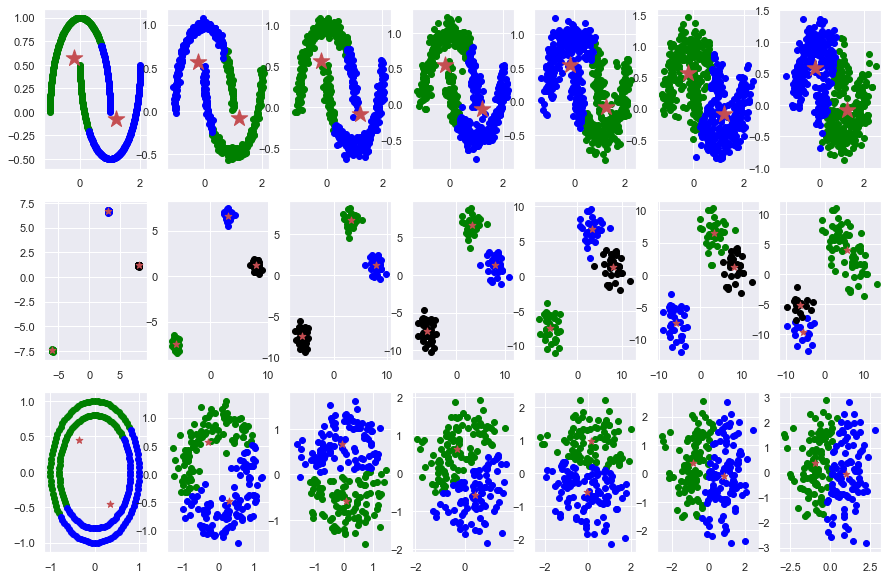

In [2]:
from k_means import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = KMeans(2, type_init=1)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = KMeans(3, type_init=1)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.zeros
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = KMeans(2, type_init=1)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')

Сравните с sklearn.cluster.KMeans

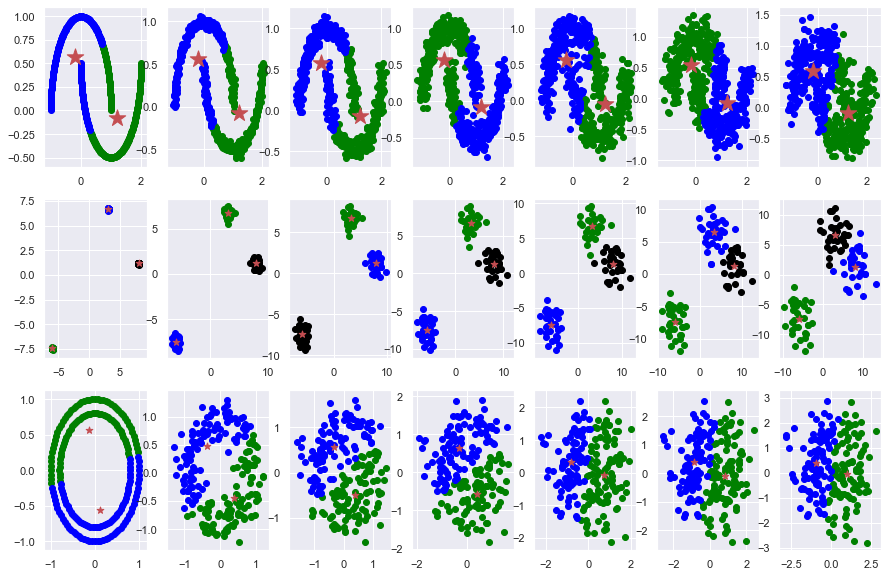

In [3]:
from sklearn.cluster import KMeans

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = KMeans(n_clusters=2, init='random')
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.cluster_centers_
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = KMeans(n_clusters=3, init='random')
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.cluster_centers_
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = KMeans(n_clusters=2, init='random')
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.cluster_centers_
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')

Сравните рандомную инцилизацию, инцилизацию первыми n_clusters и k_means++

Сделайте вывод

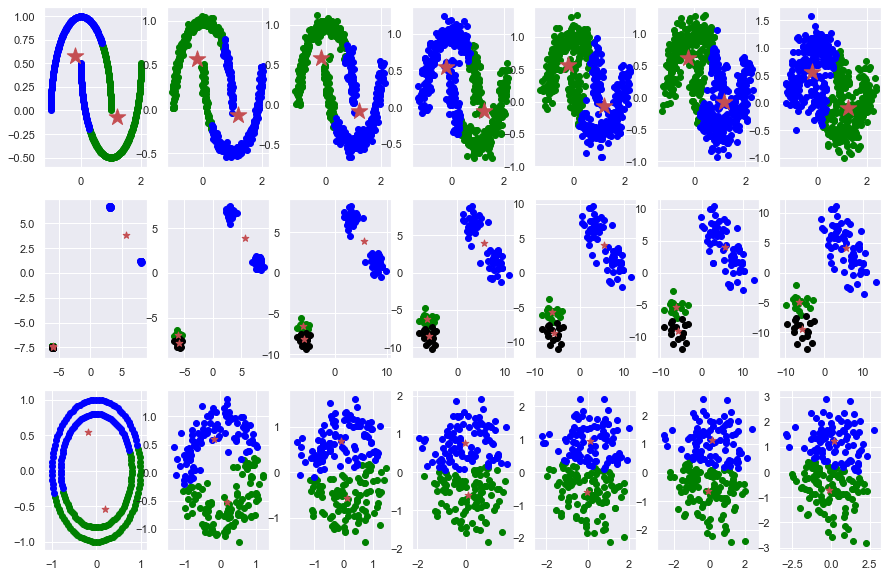

In [4]:
from k_means import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = KMeans(2, type_init=0)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = KMeans(3, type_init=0)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.zeros
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = KMeans(2, type_init=0)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')

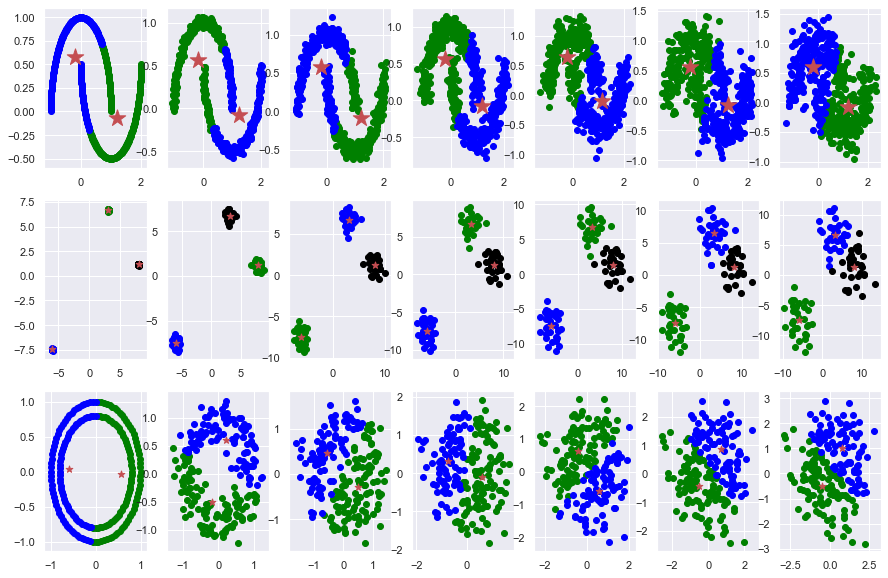

In [5]:
from k_means import KMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = KMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = KMeans(3, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.zeros
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = KMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')

__Вывод__ :

# BisectingKMeans, MiniBatchKMeans

Реализуйте класс BisectingKMeans, MiniBatchKMeans

Протестируйте на
* make_moons() с noise от 0 до 0.2
* make_blobs()
* make_circles()

Постройте графики точек + центры кластеров

**BisectingKMeans**

1. Сначала все данные это один класс
2. Затем делим на 2 класса, используя KMenas(2)
3. Считаем сумму квадратов евклидовых расстоянии до центра $\sum_{l=1}^{\ell}(X_i - C_k)^2$
4. Находим расстояние с самым большой суммой и повторяем 2-3

**MiniBatchKMeans**
1. Инициализируем центры
2. Выбираем рандомно m объектов
3. Находим классы этих объектов
4. Обновляем центры по формуле
$$ count_{id\_class} += 1$$
$$center_{id\_class} = (1 - 1/count_{id_class}) * center_{id\_class} +  1/count_{id\_class} * x_i$$
Повторяем 3-4 шаги несколько раз

/Users/mp/Documents/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/mp/Documents/venv/lib/python3.7/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


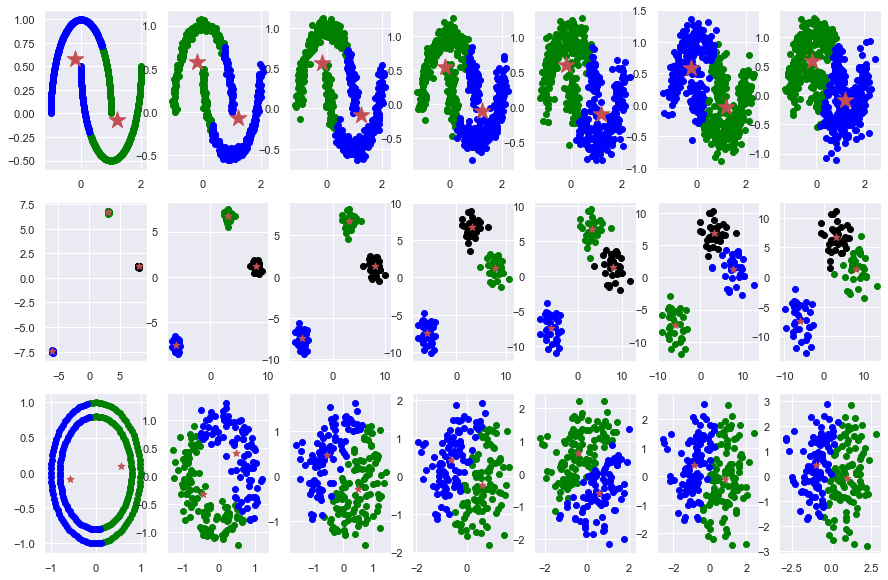

In [6]:
from bisecting_kmeans import BisectingKMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = BisectingKMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = BisectingKMeans(3, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.zeros
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = BisectingKMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')

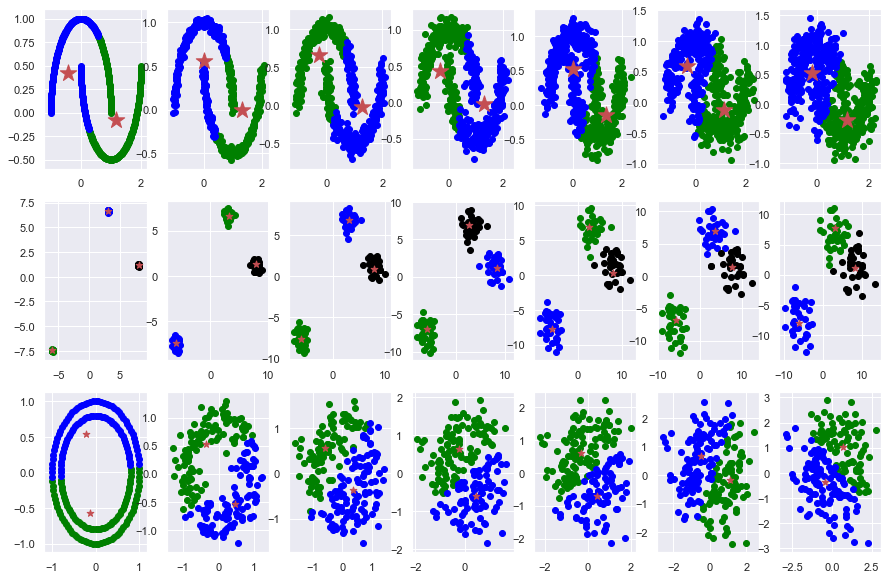

In [2]:
from minibatch_kmeans import MiniBatchKMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles

fig, axs = plt.subplots(3, 7, figsize=(15,10))
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = MiniBatchKMeans(2, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[0, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[0, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[0, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=300,
                c='r', label='centroid')
    axs[0, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=300,
                c='r', label='centroid')
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = MiniBatchKMeans(3, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[1, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[1, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    axs[1, k].scatter(x[0][v == 2, 0], x[0][v == 2, 1], c='black', label='cluster 2')
    centroids = a.zeros
    axs[1, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')
    axs[1, k].scatter(centroids[2][0], centroids[2][1], marker='*', s=50,
                c='r', label='centroid')
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = MiniBatchKMeans(2, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])
    from sklearn.datasets import make_moons
    axs[2, k].scatter(x[0][v == 0, 0], x[0][v == 0, 1], c='green', label='cluster 1')
    axs[2, k].scatter(x[0][v == 1, 0], x[0][v == 1, 1], c='blue', label='cluster 2')
    centroids = a.zeros
    axs[2, k].scatter(centroids[0][0], centroids[0][1], marker='*', s=50,
                c='r', label='centroid')
    axs[2, k].scatter(centroids[1][0], centroids[1][1], marker='*', s=50,
                c='r', label='centroid')

Сравните время работы, точность с KMeans

In [3]:
%%time
from minibatch_kmeans import MiniBatchKMeans
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = MiniBatchKMeans(2, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = MiniBatchKMeans(3, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = MiniBatchKMeans(2, 50, type_init=2)
    a.fit(x[0], 20)
    v = a.predict(x[0])

CPU times: user 554 ms, sys: 4.5 ms, total: 558 ms
Wall time: 556 ms


In [6]:
%%time
from k_means import KMeans
noises = np.linspace(0, .2, num=7)
for k,i in enumerate(noises):
    x = make_moons(n_samples=500, noise=i)
    a = KMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
noises = np.linspace(0.05, 2, num=7)
for k,i in enumerate(noises):
    x = make_blobs(n_samples=100, cluster_std=i, random_state=142, centers=3)
    a = KMeans(3, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])
noises = np.linspace(0, 1, num=7)
for k,i in enumerate(noises):
    x = make_circles(n_samples=200, noise=i, random_state=42)
    a = KMeans(2, type_init=2)
    a.fit(x[0])
    v = a.predict(x[0])

CPU times: user 1.69 s, sys: 6.45 ms, total: 1.7 s
Wall time: 1.7 s
